# Predicting Tesla's Stock Price using Machine Learning

## 1. Problem Definition
> Explore the dataset and try to predict the stock price for the next month/year.

## 2. Data
The data is downloaded from Kaggle [Tesla Stock Price](https://www.kaggle.com/rpaguirre/tesla-stock-price). There is one csv file called Tesla.csv


## 3. Evaluation
From google searching 'machine learning stock price prediction', it is well known to use the following algorithms for stock price predicting:
* Linear Regression
* K-Nearest Neighbors
* Long Short Term Memory (LSTM)
* Moving Average
* Prophet
* Auto ARIMA

From [this article](https://towardsdatascience.com/machine-learning-techniques-applied-to-stock-price-prediction-6c1994da8001), it's said that the first three has a forecast horizon of 1 day while the latter 1 year. We will try to cover all of them in this case.


## 4. Features
Within the dataset one will encounter the following:
* The date - "Date"
* The opening price of the stock - "Open"
* The high price of that day - "High"
* The low price of that day - "Low"
* The closed price of that day - "Close"
* The amount of stocks traded during that day - "Volume"
* The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"

### Data exploration (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df0 = pd.read_csv('./datasets/stock-tesla.csv')
df0.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
# Check for missing values
df0.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
df0['Date']

0       6/29/2010
1       6/30/2010
2        7/1/2010
3        7/2/2010
4        7/6/2010
          ...    
1687    3/13/2017
1688    3/14/2017
1689    3/15/2017
1690    3/16/2017
1691    3/17/2017
Name: Date, Length: 1692, dtype: object

In [6]:
# Reload the dataset with parse dates
df0 = pd.read_csv('./datasets/stock-tesla.csv', parse_dates=['Date'])
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [7]:
df0.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
# Make a copy so we can manipulate the dataset
df = df0.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [10]:
len(df)

1692

In [11]:
# Renaming the columns
df.columns = ['date', 'open', 'high', 'low', 'close', 'vol', 'adj_close']
df.head()

,date,open,high,low,close,vol,adj_close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


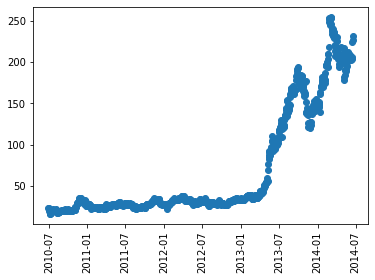

In [12]:
# Quick plot
fig, ax = plt.subplots()
ax.scatter(df.date[:1000], df.close[:1000])
plt.xticks(rotation=90);

In [19]:
# Check unique values between close and adj_close
df_temp = df.copy()
df_temp['exists'] = df_temp.drop('close', axis=1).isin(df_temp['close']).any(1)
df_temp

,date,open,high,low,close,vol,adj_close,exists
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,True
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,True
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,True
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,True
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,True
...,...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,True
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,True
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,True
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,True


In [21]:
df_temp['exists'].nunique()

1

Turns out that the `close` attribute has the exact values as `adj_close`. We might as well drop one of them.

In [22]:
df.head()

,date,open,high,low,close,vol,adj_close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [23]:
df.drop('adj_close', axis=1, inplace=True)
df.head()

,date,open,high,low,close,vol
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


### Parse datetime
[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1692 non-null   datetime64[ns]
 1   open    1692 non-null   float64       
 2   high    1692 non-null   float64       
 3   low     1692 non-null   float64       
 4   close   1692 non-null   float64       
 5   vol     1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [27]:
df.date[:1]

0   2010-06-29
Name: date, dtype: datetime64[ns]

In [28]:
df.date.dt.day[:1]

0    29
Name: date, dtype: int64

In [29]:
df.date.dt.month[:1]

0    6
Name: date, dtype: int64

In [31]:
df.date.dt.year[:1]

0    2010
Name: date, dtype: int64

In [37]:
df.date.dt.dayofweek[:1] # 0=Monday, 6=Sunday

0    1
Name: date, dtype: int64

In [38]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['dayofweek'] = df.date.dt.dayofweek

In [39]:
df.head()

,date,open,high,low,close,vol,year,month,day,dayofweek
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,2
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,3
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,4
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,1


In [40]:
df.tail()

,date,open,high,low,close,vol,year,month,day,dayofweek
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,2017,3,13,0
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,2017,3,14,1
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,2017,3,15,2
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,2017,3,16,3
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,2017,3,17,4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1692 non-null   datetime64[ns]
 1   open       1692 non-null   float64       
 2   high       1692 non-null   float64       
 3   low        1692 non-null   float64       
 4   close      1692 non-null   float64       
 5   vol        1692 non-null   int64         
 6   year       1692 non-null   int64         
 7   month      1692 non-null   int64         
 8   day        1692 non-null   int64         
 9   dayofweek  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 132.3 KB


In [48]:
df[['open', 'high', 'low', 'close', 'vol']]

,open,high,low,close,vol
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
1687,244.820007,246.850006,242.779999,246.169998,3010700
1688,246.110001,258.119995,246.020004,258.000000,7575500
1689,257.000000,261.000000,254.270004,255.729996,4816600
1690,262.399994,265.750000,259.059998,262.049988,7100400
